In [1]:
import pandas as pd
import numpy as np
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("Dimensions of train: {}".format(train.shape))
print("Dimensions of test: {}".format(test.shape))

Dimensions of train: (891, 12)
Dimensions of test: (418, 11)


In [2]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


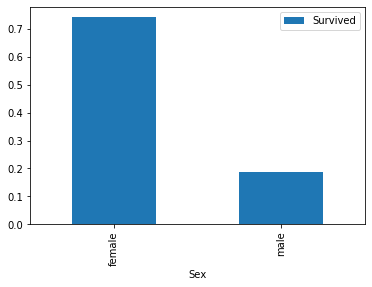

In [3]:
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

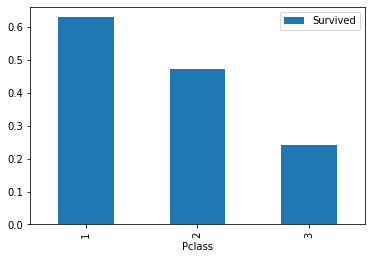

In [4]:
class_pivot = train.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()
plt.show()

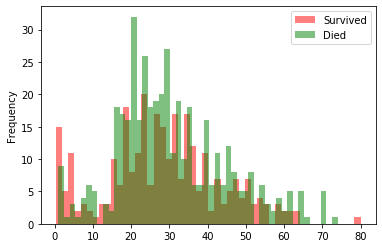

In [6]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='green',bins=50)
plt.legend(['Survived','Died'])
plt.show()

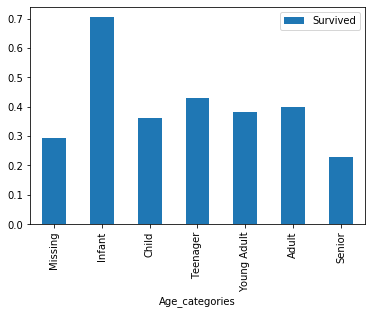

In [7]:
def age_categorize(df,cut_points,label_names):
    df['Age']=df['Age'].fillna(-0.5)
    df['Age_categories']= pd.cut(df['Age'],cut_points,labels=label_names)
    return df

cut_points= [-1,0,5,12,18,35,60,100]
label_names=['Missing','Infant','Child','Teenager','Young Adult','Adult','Senior']


train= age_categorize(train, cut_points,label_names)
test = age_categorize(test, cut_points,label_names)

pivot = train.pivot_table(index= 'Age_categories',values='Survived')
pivot.plot.bar()
plt.show()


In [8]:
def create_dummies (df,column_name):
    dummies= pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies], axis=1)
    return df
for column in ["Pclass","Sex","Age_categories"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

In [9]:
from sklearn.tree import DecisionTreeClassifier
model_titanic = DecisionTreeClassifier(max_depth=2)

In [10]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
      'Age_categories_Senior']
model_titanic.fit(train[columns], train["Survived"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

In [15]:
model_titanic.fit(train_X, train_y)
predictions = model_titanic.predict(test_X)
print(predictions)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.7988826815642458


In [14]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model_titanic, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.72222222 0.74157303 0.75280899 0.75280899 0.76404494 0.76404494
 0.78651685 0.79775281 0.80898876 0.83146067]
0.7722222222222223


In [16]:
holdout_predictions = model_titanic.predict(holdout[columns])

In [17]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

In [18]:
submission.to_csv("submission.csv",index=False)

In [19]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
